In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [21]:
df = pd.read_csv("Auto (1).csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [22]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [23]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
X = sm.add_constant(df['horsepower'])
y = df['mpg']
model = sm.OLS(X,y)
results = model.fit()

/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

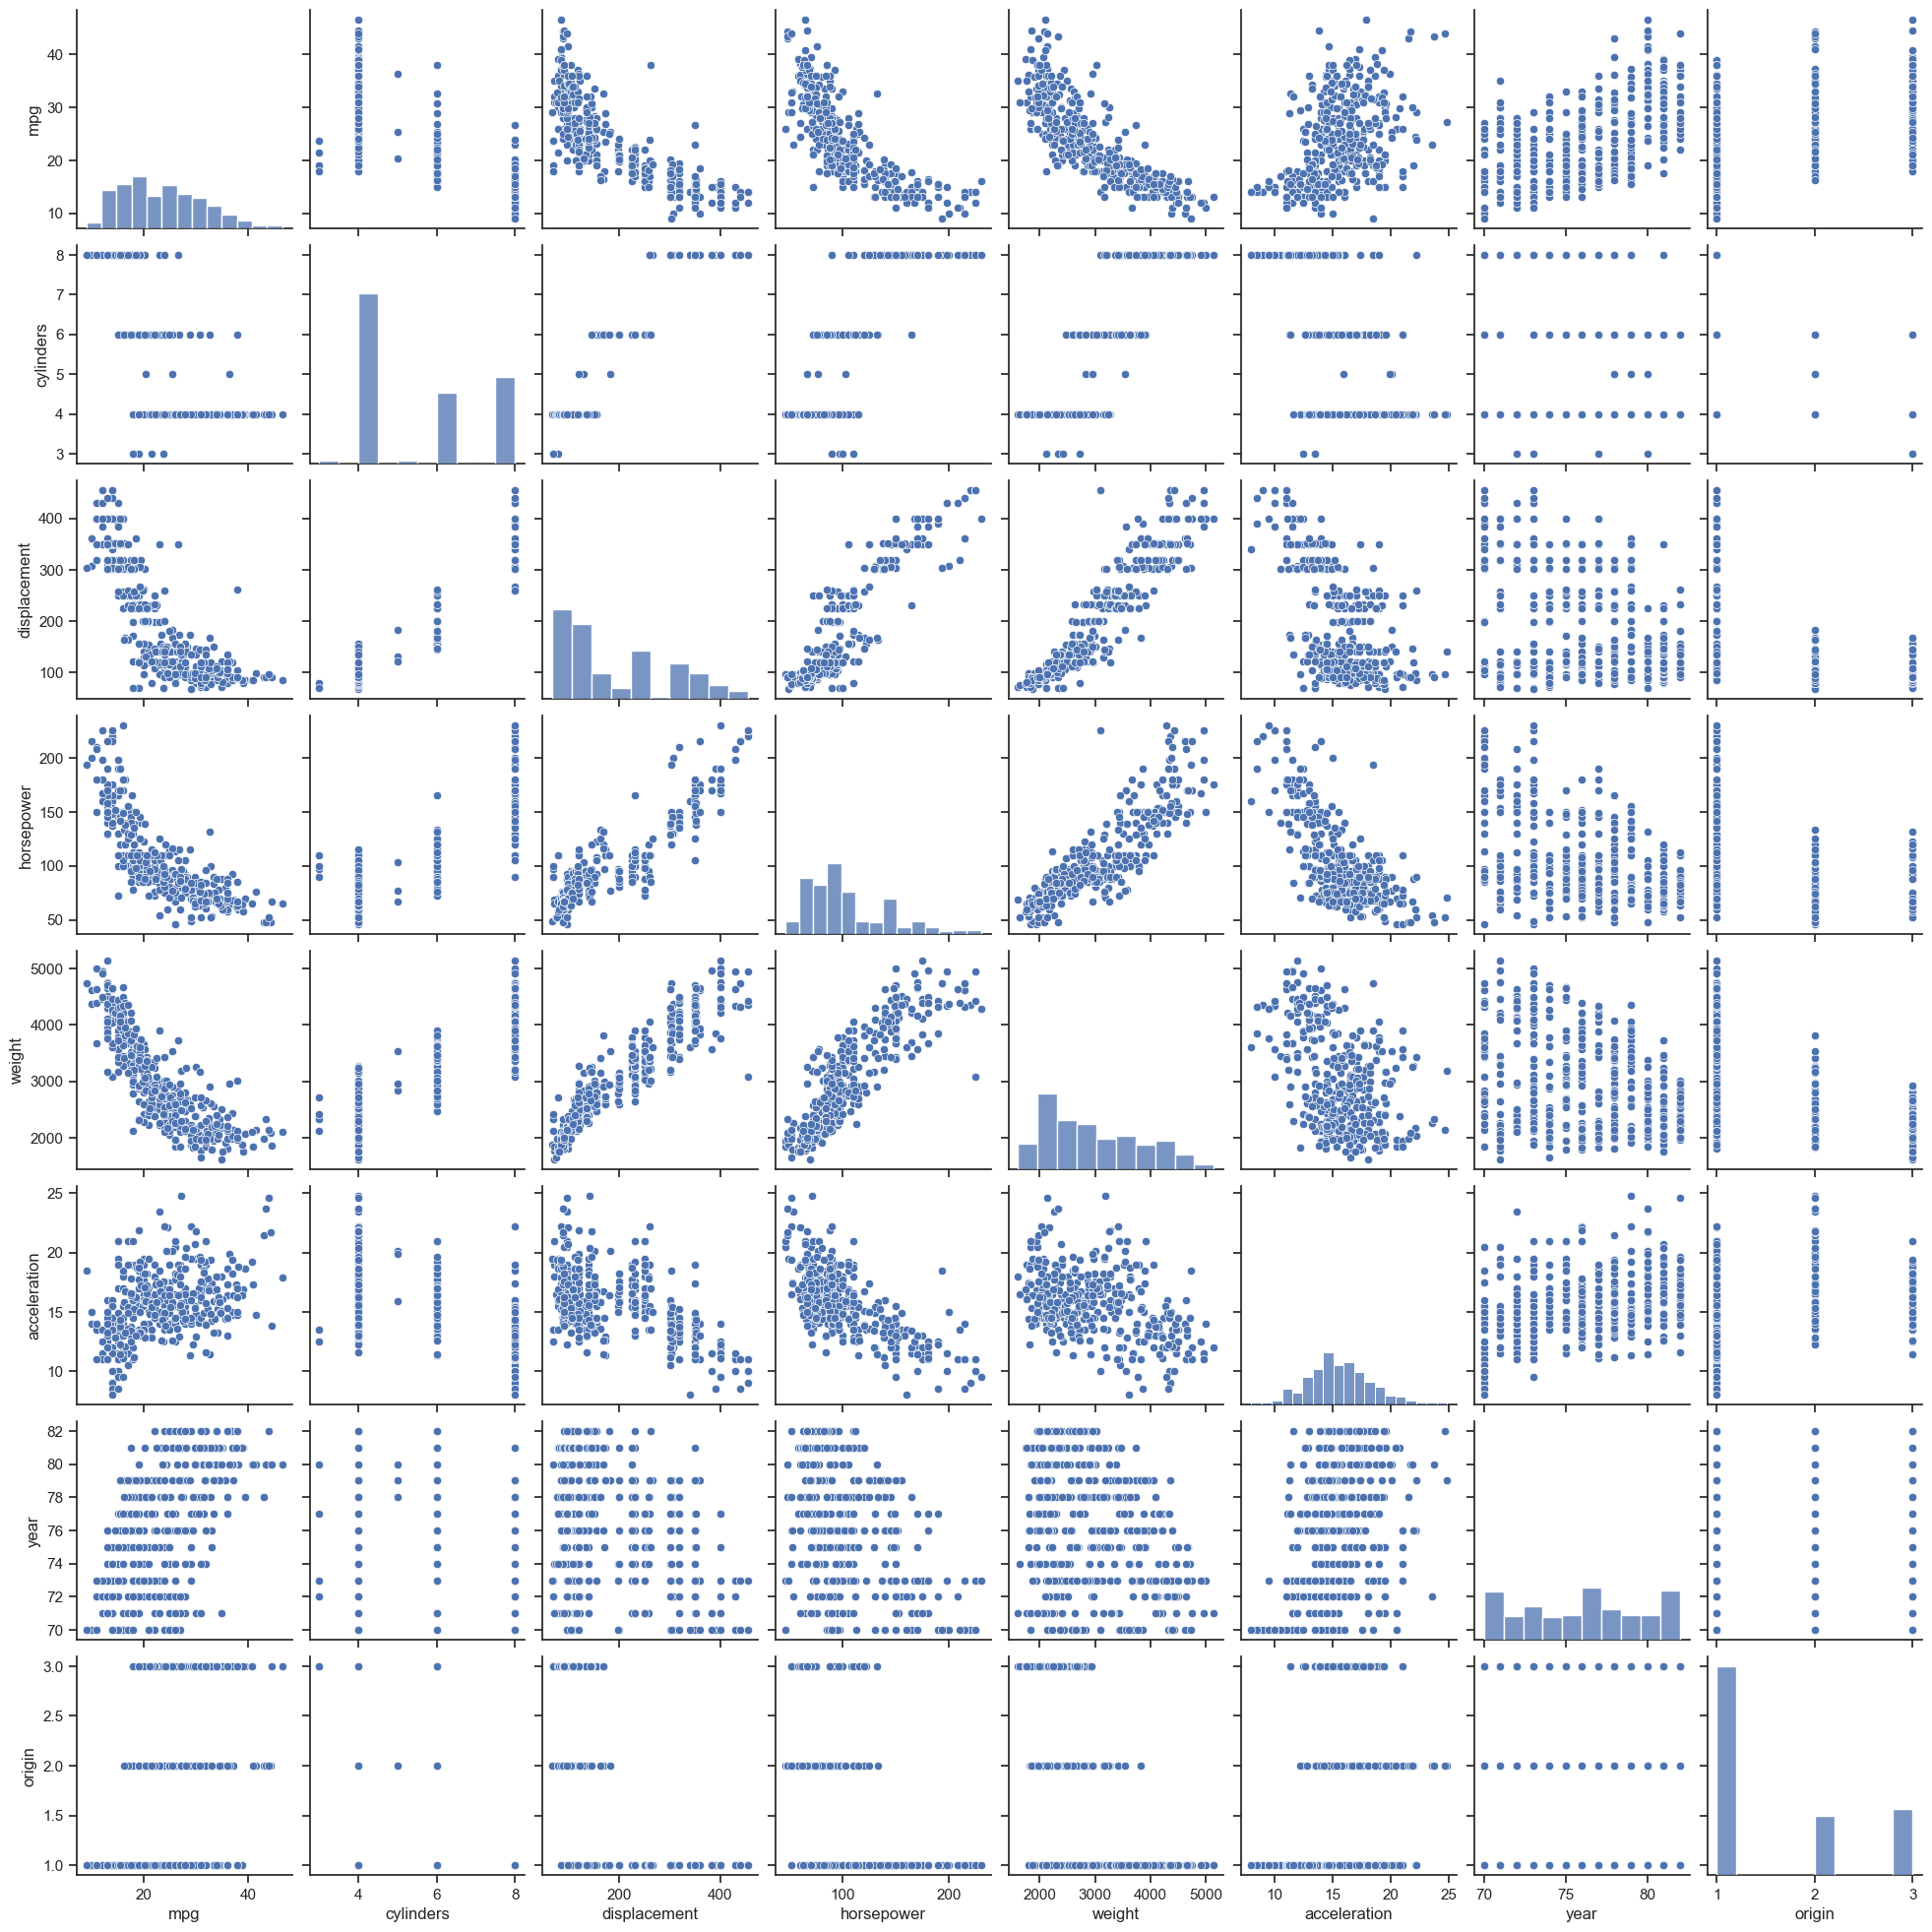

In [24]:
sns.set(style='ticks')
sns.pairplot(df)
plt.show()

In [25]:
df1 = pd.get_dummies(df, columns=['name'], drop_first=True)

In [26]:
# Assuming your DataFrame is named 'df'
correlation_matrix = df1.corr()

print(correlation_matrix)

                                mpg  cylinders  displacement  horsepower  \
mpg                        1.000000  -0.776260     -0.804443   -0.778427   
cylinders                 -0.776260   1.000000      0.950920    0.842983   
displacement              -0.804443   0.950920      1.000000    0.897257   
horsepower                -0.778427   0.842983      0.897257    1.000000   
weight                    -0.831739   0.897017      0.933104    0.864538   
...                             ...        ...           ...         ...   
name_vw dasher (diesel)    0.127843  -0.043126     -0.049907   -0.074288   
name_vw pickup             0.131701  -0.043126     -0.046533   -0.069026   
name_vw rabbit             0.106828  -0.061066     -0.067938   -0.058623   
name_vw rabbit c (diesel)  0.133630  -0.043126     -0.049907   -0.074288   
name_vw rabbit custom      0.053905  -0.043126     -0.050389   -0.044030   

                             weight  acceleration      year    origin  \
mpg           

In [32]:
new_X = sm.add_constant(df.drop(['name','horsepower'], axis = 1))
y = df['mpg']
new_model = sm.OLS(y, new_X)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.616e+26
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:26:58   Log-Likelihood:                 10134.
No. Observations:                 397   AIC:                        -2.025e+04
Df Residuals:                     389   BIC:                        -2.022e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.084e-12   2.57e-12      0.811   

In [39]:
import statsmodels.formula.api as smf

# Example: response ~ predictors (replace with your relevant predictors)
model = smf.ols("mpg ~ weight + acceleration + displacement + origin + year", data=df1)
results = model.fit()

In [40]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results, typ=2)
print(anova_results)

                   sum_sq     df           F        PR(>F)
weight        1629.558732    1.0  146.451923  7.484354e-29
acceleration    44.637468    1.0    4.011665  4.587637e-02
displacement    47.979796    1.0    4.312047  3.849608e-02
origin         272.766791    1.0   24.514134  1.099170e-06
year          2703.860234    1.0  243.001693  5.942014e-43
Residual      4350.625462  391.0         NaN           NaN


In [42]:
# so this tells me weight, displacement, origin and the year are significant factors for the response

In [43]:
# this tells us that newer cars end to have higher fuel efficency

eval_env: 1


/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/regressionplots.py:429: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


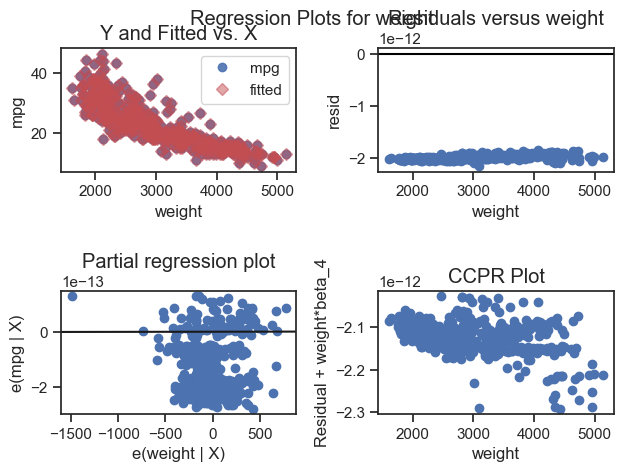

In [46]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is your fitted OLS model:
# 1. Residuals vs Fitted
sm.graphics.plot_regress_exog(new_results, "weight")  # replace with your actual predictor
plt.show()

eval_env: 1


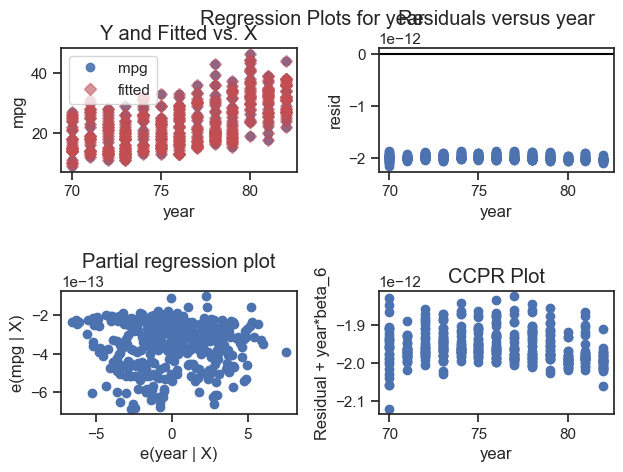

In [47]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is your fitted OLS model:
# 1. Residuals vs Fitted
sm.graphics.plot_regress_exog(new_results, "year")  # replace with your actual predictor
plt.show()

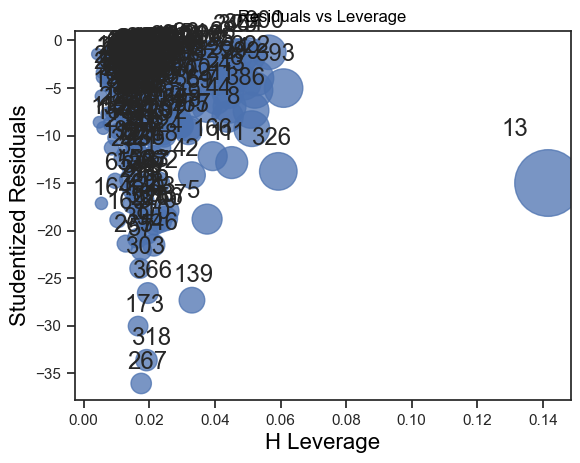

In [48]:
sm.graphics.influence_plot(new_results)
plt.title("Residuals vs Leverage")
plt.show()

In [49]:
# There is one high leverage point

In [50]:
import statsmodels.formula.api as smf

model = smf.ols("mpg ~ horsepower * weight + acceleration + year", data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          5.10e-161
Time:                        16:49:00   Log-Likelihood:                -978.86
No. Observations:                 392   AIC:                             1970.
Df Residuals:                     386   BIC:                             1994.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.9339      4.43

In [51]:
import numpy as np
import statsmodels.formula.api as smf

# Log transformation
df['log_weight'] = np.log(df['weight'])

# Square root transformation
df['sqrt_weight'] = np.sqrt(df['weight'])

# Square (quadratic) transformation
df['weight2'] = df['weight'] ** 2

# Example model with transformations
model_log = smf.ols("mpg ~ log_weight", data=df).fit()
model_sqrt = smf.ols("mpg ~ sqrt_weight", data=df).fit()
model_quad = smf.ols("mpg ~ weight + weight2", data=df).fit()

print(model_log.summary())
print(model_sqrt.summary())
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     978.1
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          6.42e-109
Time:                        16:50:09   Log-Likelihood:                -1132.3
No. Observations:                 397   AIC:                             2269.
Df Residuals:                     395   BIC:                             2277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.5391      5.984     35.185      0.0